In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import sys
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
#def getRangeIndexes(arr, var_min, var_max):
 #   return np.where((arr >= var_min) & (arr <= var_max))[0]

In [4]:
nut_f = ["med-cmcc-tem-an-fc-m_1628662441026.nc"]


nut_nc = [os.path.join(f) for f in nut_f]


In [5]:
nut_ds = [ xr.open_dataset(nc) for nc in nut_nc]

j = 0

In [6]:
nut_ds[j].thetao

<xarray.DataArray 'thetao' (time: 8, depth: 74, lat: 216, lon: 241)>
[30817152 values with dtype=float32]
Coordinates:
  * depth    (depth) float32 1.018 3.166 5.465 7.92 ... 937.9 971.1 1.005e+03
  * lon      (lon) float32 12.0 12.04 12.08 12.12 ... 21.88 21.92 21.96 22.0
  * time     (time) datetime64[ns] 2019-05-16T12:00:00 ... 2019-12-16T12:00:00
  * lat      (lat) float32 37.02 37.06 37.1 37.15 ... 45.85 45.9 45.94 45.98
Attributes:
    units:          degrees_C
    standard_name:  sea_water_potential_temperature
    long_name:      potential temperature
    _ChunkSizes:    [  1  29  76 258]

In [7]:
lon_name = 'lon'
lat_name = 'lat'
time_name = 'time'
depth_name = 'depth'

In [8]:
temp_mean = nut_ds[j].mean(dim=(lat_name, lon_name, depth_name), skipna=True)
temp_mean

<xarray.Dataset>
Dimensions:  (time: 8)
Coordinates:
  * time     (time) datetime64[ns] 2019-05-16T12:00:00 ... 2019-12-16T12:00:00
Data variables:
    thetao   (time) float32 15.01 15.74 16.44 16.87 16.98 16.73 16.27 15.62

In [9]:
# Plot configuration
width_inch = 16
height_inch = 8

title_fontstyle = {
    "fontsize": "14",
    "fontstyle": "italic",
    "fontweight": "bold",
    "pad": 30
}

label_fontstyle = {
    "fontsize": "12",
    "labelpad": 30
}

In [10]:
def checkDir(outPath):
    if not os.path.exists(outPath):
        os.makedirs(outPath)

In [15]:

timesteps = temp_mean.time

sig1 = temp_mean.thetao

#color1 = 'r'

color1 = 'b'




In [16]:
lat_sel, lon_sel, depth_sel = 41.951909, 17.4435, 5
temp_mean_sel = nut_ds[j].sel(lat=lat_sel, lon=lon_sel,depth=depth_sel, method="nearest")
temp_mean_sel.thetao

<xarray.DataArray 'thetao' (time: 8)>
array([17.179747, 22.521986, 25.589731, 26.477093, 24.798656, 21.673882,
       18.85548 , 16.666807], dtype=float32)
Coordinates:
    depth    float32 5.465
    lon      float32 17.46
  * time     (time) datetime64[ns] 2019-05-16T12:00:00 ... 2019-12-16T12:00:00
    lat      float32 41.94
Attributes:
    units:          degrees_C
    standard_name:  sea_water_potential_temperature
    long_name:      potential temperature
    _ChunkSizes:    [  1  29  76 258]

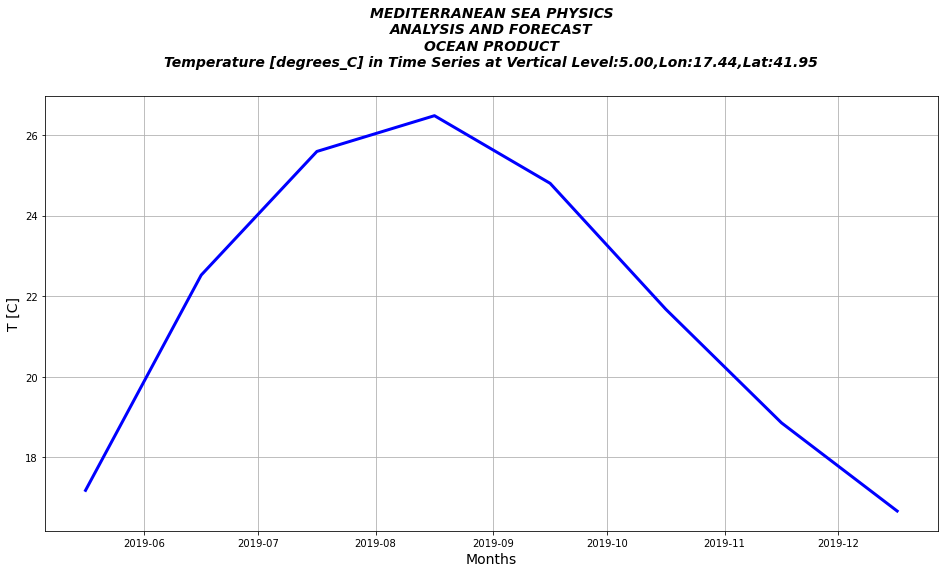

In [18]:
fig, ax1 = plt.subplots(figsize=(width_inch, height_inch))

timesteps = temp_mean_sel.time

sig1 = temp_mean_sel.thetao

color1 = 'b'

ax1.plot(timesteps, sig1, color1,linewidth=3)
ax1.set_ylabel('T [C]', fontsize=14)
ax1.set_xlabel("Months", fontsize=14)
title = "MEDITERRANEAN SEA PHYSICS\nANALYSIS AND FORECAST\nOCEAN PRODUCT\nTemperature [{:s}] in Time Series at Vertical Level:{:.2f},Lon:{:.2f},Lat:{:.2f}".format(temp_mean_sel.thetao.units,depth_sel,lon_sel,lat_sel)
plt.title(title, **title_fontstyle)


plt.grid()

plt.savefig('temperature_in_ts.png')


plt.show()

plt.close()